<h2 style="color:blue" align="center"> WTF23 DATA SCIENCE AND ARTIFICAIL INTELLIGENCE </h2>
<h2 style="color:blue" align="center"> GROUP C SUBGROUP 1 </h2>
<h2 style="color:blue" align="center"> CLASSWORK ON DECISION TREE ALGORITHM USING THE TITANIC DATA</h2>

<h3>Exercise</h3>

<p>In this file using following columns build a model to predict if person would survive or not,

1. Pclass

2. Sex

3. Age

4. Fare

Calculate score of your model
</p>

<h3> INTRODUCTION AND EDA</h3>
Our data set is on the passengers of the RMS Titanic. We will use an open data set with data on the passengers aboard the infamous doomed sea voyage of 1912. By examining factors such as class, sex, fare and age, we will experiment with different machine learning algorithms and build a program that can predict whether a given passenger would have survived this disaster.

<h3> Setting Up Your Machine Learning Module </h3>
<p> To do this, you will need to install a few software packages such as Python (version 3.9.13 was used for this project), SciPy Ecosystem (NumPy, SciPy, Pandas, IPython, matplotlib) SciKit-Learn, seaborn, matplotlib, panada, numpy. </p> <br>

To get started we import the libraries for the workflow, read in the Titatic data set and view a portion of it.

The column heading variables have the following meanings:

* PassengerID: Serial tag of the passenger
* survived: Survival (0 = no; 1 = yes)
* Pclass: Passenger class (1 = first; 2 = second; 3 = third)
* name: Name
* sex: Sex
* age: Age
* sibsp: Number of siblings/spouses aboard
* parch: Number of parents/children aboard
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin
* embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
#import libraries for the workflow

# import basic libraries and read data
import pandas as pd
import random
import numpy as np

#for modelbuilding
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, svm, tree, preprocessing
from sklearn.model_selection import cross_validate
import sklearn.ensemble as ske

#for graphs, visuals, etc.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data set as df
df = pd.read_csv('titanic.csv')

#visualise the first 10 rows of the dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# CHECK THE LABELS OF THE COLUMN
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h3> From observation, we noticed that we have missing values on "Age" and "Cabin". We will be filling up the missin data in Age using its mean, but we will be removing Cabin as it is not useful for our analysis. 

In [4]:
#check data for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#drop columns that will not be used in the work flow
df.drop(columns = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
#using mean to fill the missing values in the age col
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [7]:
# check for number of rows and column
df.shape

(891, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


<h3> First, let’s examine the overall chance of survival for a Titanic passenger. </h3>

<p> The calculation shows that only 38% of the passengers survived. Not the best odds. The reason for this massive loss of life is that the Titanic was only carrying 20 lifeboats, which was not nearly enough for the 1,317 passengers and 885 crew members aboard. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to examine the social dynamics that determined who got a place on a lifeboat and who did not. </p>

In [9]:
df['Survived'].mean()

0.3838383838383838

<p> As at the time of this event, social classes were heavily stratified. This was especially true on the Titanic, where the luxurious first-class areas were completely off limits to the middle-class passengers in second class, and especially to those who carried a third class “economy price” ticket. To get a view into the composition of each class, we can group data by "Pclass", and view the averages for each column. </p>

<p> From the result we have some interesting insights from this data
    
 1. Passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. 
 2. The lower classes generally consisted of younger people with an average age of 26 years old
 3. The ticket prices for first class were predictably much higher than those for second and third class. The average ticket price for first class is £84. </p>

In [10]:
df.groupby('Pclass').mean()

,Survived,Age,Fare
Pclass,,,
1,0.629630,37.048118,84.154687
2,0.472826,29.866958,20.662183
3,0.242363,26.403259,13.675550


<h2> Extending our statistical breakdown using the grouping function for both class and sex:</h2>

<p> Fromt the output as well as the bar plot, we can see that the female passengers had higher survival rate as compared to the male conterpart 
<br> While the Titanic was sinking, the officers famously prioritized who was allowed in a lifeboat with the strict maritime tradition of evacuating women and children first. Our statistical results clearly reflect the first part of this policy as, across all classes, women were much more likely to survive than the men. We can also see that the women were younger than the men on average, were more likely to be traveling with family, and paid slightly more for their tickets.</p>



In [11]:
#Group data by class and sex
grpClSex = df.groupby(['Pclass','Sex']).mean()
grpClSex

Survived        Age        Fare
Pclass Sex                                    
1      female  0.968085  34.141405  106.125798
       male    0.368852  39.287717   67.226127
2      female  0.921053  28.748661   21.970121
       male    0.157407  30.653908   19.741782
3      female  0.500000  24.068493   16.118810
       male    0.135447  27.372153   12.661633

<AxesSubplot:xlabel='Pclass,Sex'>

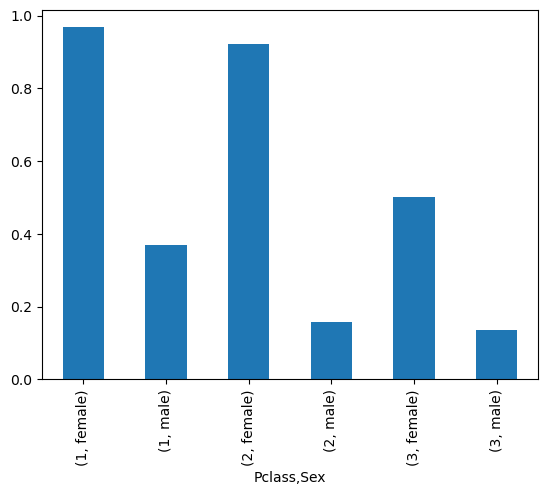

In [12]:
# Plot the grouped data by class and sex
grpClSex['Survived'].plot.bar()

<p> The effectiveness of the second part of this “Women and children first” policy can be deduced by breaking down the survival rate by age. </p>

<p> Here we can see that children were indeed the most likely age group to survive, although this percentage was still tragically below 60%.</p>

<AxesSubplot:xlabel='Age'>

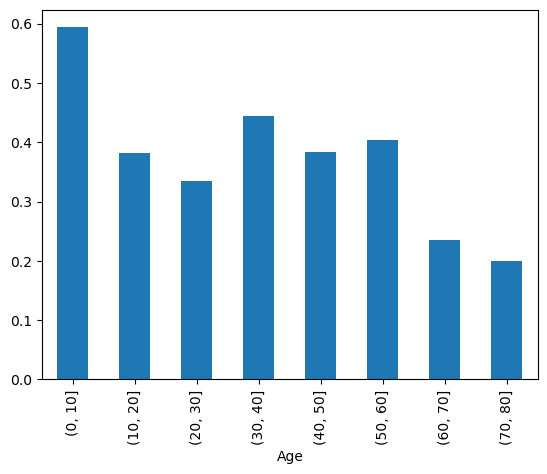

In [13]:
#group the survival by age
grp_age = pd.cut(df["Age"], np.arange(0, 90, 10))
age_grps = df.groupby(grp_age).mean()
age_grps['Survived'].plot.bar()

<h3> PREPARING DATA FOR MACHINE LEARNING ALGORITHM </h3>
<p>Formatting the remaining data in a way that our machine learning algorithms will accept.<br>

The “sex” field is both string values that correspond to categories (i.e “Male” and “Female”) so we will run each through a preprocessor. This preprocessor will convert these strings into integer keys, making it easier for the classification algorithms to find patterns. For instance, “Female” and “Male” will be converted to 0 and 1 respectively. Other columns that are not useful in the data anlysis have been dropped already.<br>
    
We will then split the dataset into the 'test' and 'trian' date set at the 20-80% ratio before running a decision tree algorithm on it. We will also score our model.
</p>

In [14]:
## preprocess the data and perform label encoding
def df_preprocessed(df):
    df_processed = df.copy()
    le = preprocessing.LabelEncoder()
    df_processed.Sex = le.fit_transform(df_processed.Sex)
    return df_processed

In [15]:
## run the function on the dataf frame
df_processed =df_preprocessed(df)

<h2> Split data into response and predictor </h2>

<p> Next, we separate the data set into two arrays: “X” containing all of the values for each row besides “survived”, and “y” containing only the “survived” value for that row. The classification algorithms will compare the attribute values of “X” to the corresponding values of “y” to detect patterns in how different attributes values tend to affect the survival of a passenger. <br>
    
Finally, we break the “X” and “y” array into two parts each — a training set and a testing set. We will feed the training set into the classification algorithm to form a trained model. Once the model is formed, we will use it to classify the testing set, allowing us to determine the accuracy of the model. Here we have have made a 20/80 split, such that 80% of the data set will be used for training and 20% will be used for testing.</p>

In [16]:
#split data into dependent and independent varaible
X = df_processed.drop(['Survived'], axis=1).values
y = df_processed['Survived'].values

In [17]:
#Split data into test and train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state =1)


In [18]:
# create object for the decision tree model
model = tree.DecisionTreeClassifier()

In [19]:
# train the model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
# score the model
model.score(X_train,y_train)

0.9845505617977528

In [21]:
model.score(X_test,y_test)

0.7597765363128491